---
# Data analysis Project 2
### Correlation and Regression of Movie Ratings Data
---

### Dataset description

This dataset features ratings data of 400 movies from 1097 research participants. 

* 1st row: Headers (Movie titles/questions) – note that the indexing in this list is from 1
* Row 2-1098: Responses from individual participants
* Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)
* Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)
* Columns 422-464: These columns contain responses to personality questions (1-5)
* Columns 465-474: These columns contain self-reported movie experience ratings (1-5)
* Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)
* Column 476: Only child (1 = yes, 0 = no, -1 = no response)
* Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)

Note that we did most of the data munging for you already (e.g. Python interprets commas in a csv file as separators, so we removed all commas from movie titles), but you still need to handle missing data.

# Data Cleaning and Preparation

- Remove outliers

User 896 didn't have any movie ratings and also the only answers to behavior questions were -1, which means that the user didn't respond.


- Replace -1 with NaN

For dependent variables ('Are you an only child? (1: Yes; 0: No; -1: Did not respond)' and 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)') -1 has the same meaning as nan, so I replaced -1 with nan.


- Replace missing values

For independent variables (movie ratings) replace missing value with the median of the movie ratings by other users. Some variables, such as gender, even if it was an independent variable, would not be appropriate to replace missing values (found 24 such cases) with the median. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

movieReplicationSet_df = pd.DataFrame(pd.read_csv('movieReplicationSet.csv'))

def convert_to_numeric(df):
    """
    input: dataframe
    output: datatframe with all of its columns' converted to numeric  
    """
    df_c =df.copy()
    for i in range(df_c.ndim):
        df_c.iloc[:,i]= df_c.iloc[:,i].apply(pd.to_numeric, errors='coerce') 
    return df_c

all_ratings_df = convert_to_numeric(movieReplicationSet_df.copy())
print(all_ratings_df.shape)
movie_ratings_df = all_ratings_df.iloc[:,0:400]
print(movie_ratings_df.shape)
movie_ratings_df.head(5)

(1097, 477)
(1097, 400)


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II,Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN


In [2]:
other_ratings_df = all_ratings_df.iloc[:,400:]
print(other_ratings_df.shape)
other_ratings_df.head(5)

(1097, 77)


,I enjoy driving fast,I enjoy rollercoasters,Have you ever bungee-jumped?,I enjoy impulse shopping,I sometimes go out on weeknights even if I have work to do,I enjoy doing things without too much planning,Have you ever been rock climbing?,I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve,I enjoy going to large music or dance festivals,I enjoy watching horror movies,...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,5.0,5.0,2.0,5.0,1.0,2.0,3.0,1.0,4.0,1.0,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,4.0,5.0,2.0,4.0,2.0,1.0,1.0,2.0,4.0,1.0,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,4.0,4.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,1.0,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,5.0,5.0,2.0,5.0,4.0,2.0,4.0,4.0,5.0,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,4.0,1.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [3]:
#transpose the movies dataframe such that each column represents a user 
all_ratings_df_T = all_ratings_df.T
print(all_ratings_df_T.shape)

movie_ratings_df_T =  movie_ratings_df.copy().T
print(movie_ratings_df_T.shape)
movie_ratings_df_T.head(5)

(477, 1097)
(400, 1097)


,0,1,2,3,4,5,6,7,8,9,...,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096
The Life of David Gale (2003),NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.5,NaN,NaN,...,2.5,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
Wing Commander (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
Django Unchained (2012),4.0,1.5,NaN,2.0,3.5,NaN,NaN,3.5,NaN,NaN,...,3.5,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0
Alien (1979),NaN,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,3.0,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
Indiana Jones and the Last Crusade (1989),3.0,NaN,NaN,3.0,0.5,2.0,NaN,3.0,NaN,NaN,...,1.0,1.5,NaN,3.0,3.5,3.5,4.0,NaN,NaN,2.5


In [4]:
other_ratings_df_T = other_ratings_df.T
print(other_ratings_df_T.shape)
other_ratings_df_T.head(5)

(77, 1097)


,0,1,2,3,4,5,6,7,8,9,...,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096
I enjoy driving fast,5.0,4.0,4.0,5.0,4.0,1.0,3.0,5.0,2.0,2.0,...,5.0,4.0,4.0,2.0,2.0,2.0,3.0,4.0,3.0,5.0
I enjoy rollercoasters,5.0,5.0,4.0,5.0,1.0,4.0,2.0,5.0,5.0,2.0,...,4.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0
Have you ever bungee-jumped?,2.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
I enjoy impulse shopping,5.0,4.0,2.0,5.0,3.0,3.0,1.0,4.0,5.0,3.0,...,4.0,5.0,4.0,1.0,4.0,5.0,5.0,2.0,5.0,5.0
I sometimes go out on weeknights even if I have work to do,1.0,2.0,2.0,4.0,2.0,4.0,1.0,5.0,4.0,1.0,...,4.0,1.0,4.0,1.0,1.0,2.0,4.0,3.0,2.0,4.0


### Histogram of number of nans pers movie and other questions for each user

Second histogram shows that there are case/s where all 400 movie ratings are null. Similarly, third histogram shows that there are case/s where almost all of the 77 other rathings are null. After observing the histograms we looked into the data and found that user 896 was the culprit. 

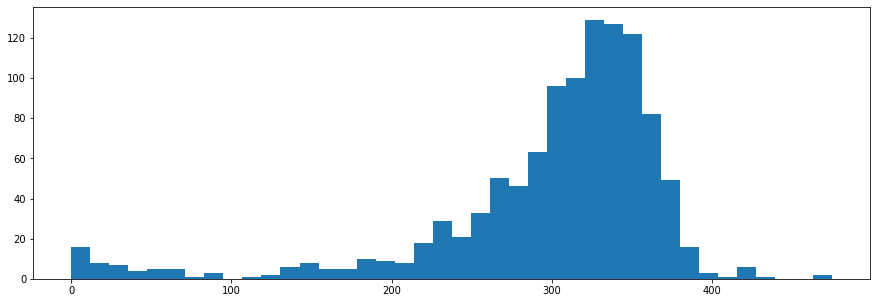

In [5]:
plt.figure(figsize=(15,5))
plt.hist(all_ratings_df_T.isna().sum(), bins = 40);

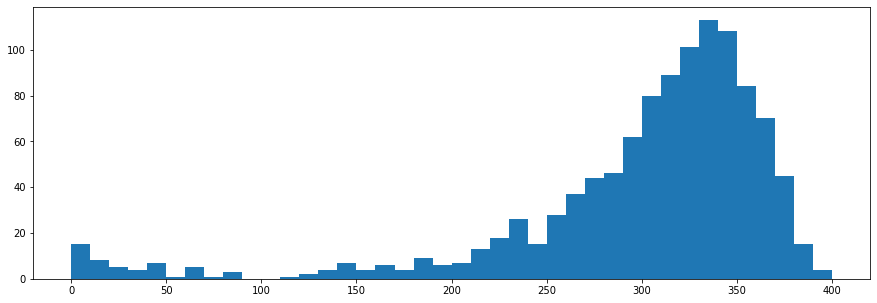

In [6]:
plt.figure(figsize=(15,5))
plt.hist(movie_ratings_df_T.isna().sum(), bins = 40);

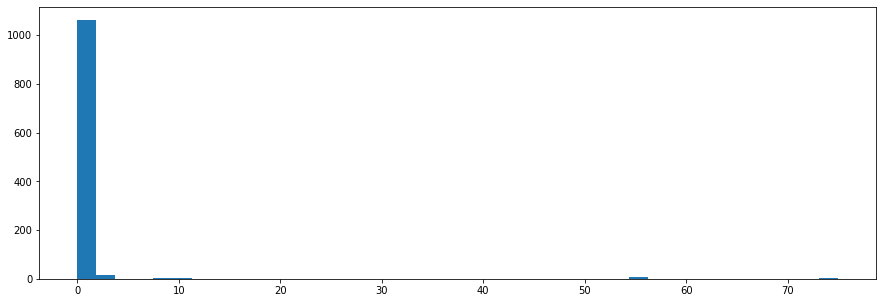

In [7]:
plt.figure(figsize=(15,5))
plt.hist(other_ratings_df_T.isna().sum(), bins = 40);

## Find outliers especially records that are not useful because of too many missing value

We found user 896 did not have any movie ratings and also the only answers to behaviour questions were -1, which means that the user didnt respond, so we replaced -1 with nan for the columns where they have the same meaning. We then filled other missing values with median value of the movie ratings by other users, and removed the records for user 896.  

In [8]:
#check if any users have all values nan, all movie ratings nan or all other ratings nan
df_names = ["movie_ratings_df \n \t movie with all user ratings nan:", 
            "movie_ratings_df_T  \n \t user with all movie ratings nan:", 
            "other_ratings_df\n \t behaviour questions with all user ratings nan:", 
            "other_ratings_df_T\n \t user with all behaviour questions ratings nan:"]
dfs = [movie_ratings_df, movie_ratings_df_T, other_ratings_df, other_ratings_df_T]

for d in range(len(dfs)):
    print(df_names[d], dfs[d].columns[dfs[d].isna().all()].tolist())

movie_ratings_df 
 	 movie with all user ratings nan: []
movie_ratings_df_T  
 	 user with all movie ratings nan: [896]
other_ratings_df
 	 behaviour questions with all user ratings nan: []
other_ratings_df_T
 	 user with all behaviour questions ratings nan: []


### user 896

In [9]:
print(all_ratings_df_T.loc[:,896].unique())
all_ratings_df_T.loc[:,896]

[nan -1.]


The Life of David Gale (2003)                                              NaN
Wing Commander (1999)                                                      NaN
Django Unchained (2012)                                                    NaN
Alien (1979)                                                               NaN
Indiana Jones and the Last Crusade (1989)                                  NaN
                                                                          ... 
Movies change my position on social economic or political issues           NaN
When watching movies things get so intense that I have to stop watching    NaN
Gender identity (1 = female; 2 = male; 3 = self-described)                 NaN
Are you an only child? (1: Yes; 0: No; -1: Did not respond)               -1.0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)        -1.0
Name: 896, Length: 477, dtype: float64

### Replace -1 with NAN if they mean the same thing

In general, not responding to a question is the same as NaN so for consistency find the columns where "Did not respond" is categorized and replace -1 with NaN.


In [10]:
other_ratings_df.columns

Index(['I enjoy driving fast', 'I enjoy rollercoasters ',
       'Have you ever bungee-jumped?', 'I enjoy impulse shopping',
       'I sometimes go out on weeknights even if I have work to do',
       'I enjoy doing things without too much planning ',
       'Have you ever been rock climbing?',
       'I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve',
       'I enjoy going to large music or dance festivals ',
       'I enjoy watching horror movies', 'No risk - No fun',
       'I like to be surprised even if it startles or scares me',
       'Have you ever parachuted?', 'I enjoy haunted houses',
       'I had a sheltered upbringing', 'My life is very stressful',
       'I value my life to be well ordered and predictable',
       'Have you ridden a motorcycle?', 'Have you gambled or bet for money?',
       'Have you ever been sky-diving?', 'Is talkative',
       'Tends to find fault with others', 'Does a thorough job',
       'Is depressed/Blue', 'Is o

In [11]:
clean_all_ratings_df = all_ratings_df.copy()
cols_no_response = ['Are you an only child? (1: Yes; 0: No; -1: Did not respond)', 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']
clean_all_ratings_df[cols_no_response] = clean_all_ratings_df[cols_no_response].replace(-1, np.nan)

In [12]:
#make sure only -1 is replaced with nan
for i in cols_no_response:
    print(all_ratings_df[[i]].groupby(i).size())
    print(clean_all_ratings_df[[i]].groupby(i).size())

Are you an only child? (1: Yes; 0: No; -1: Did not respond)
-1     26
 0    894
 1    177
dtype: int64
Are you an only child? (1: Yes; 0: No; -1: Did not respond)
0.0    894
1.0    177
dtype: int64
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
-1     25
 0    462
 1    610
dtype: int64
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0.0    462
1.0    610
dtype: int64


## Fill missing values in independent variables

User 235 is an example where the user rated 37 out of 400 movies and all of those ratings were "4". Therefore, replace nan with the average value of its features (how other users rated that movie) instead of the average value of that user's rating because the user might have selectively watched the movie and it does not make sense to rate all of that users movie with "4". 

In [13]:
#user 235 
print("number of movie ratings with nan for user 235:", clean_all_ratings_df.T.iloc[:400, 235].isna().sum())
print("unique ratings given by 235:", clean_all_ratings_df.T.iloc[:400,235].unique())
print("variance of movie ratings given by 235:", clean_all_ratings_df.T.iloc[:400,235].var())
print("number of other ratings with nan for user 235:", clean_all_ratings_df.T.iloc[400:,235].isna().sum())

number of movie ratings with nan for user 235: 363
unique ratings given by 235: [nan  4.]
variance of movie ratings given by 235: 0.0
number of other ratings with nan for user 235: 0


In [14]:
#First tried to create a userID so that we dont have to depend on the index, but I had to remove the column
#userID when calculating correlation matrix, and the matrix will just be based on the index so I decided to take 
#care of the index while finding the max correlation coefficient

#clean_all_ratings_df.reset_index(inplace=True)
#clean_all_ratings_df = clean_all_ratings_df.rename(columns = {'index':'userID'})

In [15]:
# not all columns should be replaced with nan for example gender
clean_all_ratings_df["Gender identity (1 = female; 2 = male; 3 = self-described)"].isna().sum()

24

In [16]:
#drop the outlier user 896
clean_all_ratings_df = clean_all_ratings_df.drop([896]).reset_index(drop=True)
#later add 1 to any user id that is greater than 895
print("Shape of the dataframe after dropping outlier:", clean_all_ratings_df.shape)

#transpose the movies dataframe such that each column represents a user 
clean_all_ratings_df_T = clean_all_ratings_df.T
print("Shape of the dataframe after transpose:", clean_all_ratings_df_T.shape)

clean_movie_ratings_df =  clean_all_ratings_df.copy().iloc[:,:400]
#fill missing data with column median
clean_movie_ratings_df.fillna(clean_movie_ratings_df.median(), inplace=True)

clean_movie_ratings_df_T =  clean_movie_ratings_df.T
print("Shape of the movie ratings after transpose:", clean_movie_ratings_df_T.shape)

#print the mean of first column to make  sure nan are filled as expected
print("Median value of the first movie:", clean_all_ratings_df.iloc[:,0].median())
clean_movie_ratings_df_T.head(5)

Shape of the dataframe after dropping outlier: (1096, 477)
Shape of the dataframe after transpose: (477, 1096)
Shape of the movie ratings after transpose: (400, 1096)
Median value of the first movie: 2.5


,0,1,2,3,4,5,6,7,8,9,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
The Life of David Gale (2003),2.5,2.5,2.5,2.5,2.5,3.0,2.5,3.5,2.5,2.5,...,2.5,2.5,2.5,2.5,2.5,2.5,3.0,2.5,2.5,2.5
Wing Commander (1999),2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0
Django Unchained (2012),4.0,1.5,3.5,2.0,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.0,3.5,4.0,3.5,3.5,3.5,3.5,3.5,4.0
Alien (1979),3.0,3.0,3.0,3.0,3.0,2.5,3.0,2.5,3.0,3.0,...,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
Indiana Jones and the Last Crusade (1989),3.0,3.0,3.0,3.0,0.5,2.0,3.0,3.0,3.0,3.0,...,1.0,1.5,3.0,3.0,3.5,3.5,4.0,3.0,3.0,2.5


In [17]:
clean_other_ratings_df = clean_all_ratings_df.copy().iloc[:,400:]
clean_other_ratings_df_T = clean_other_ratings_df.T
print("Shape of the other ratings after transpose:", clean_other_ratings_df_T.shape)

Shape of the other ratings after transpose: (77, 1096)


### Histogram of the number of Nan in movie ratings

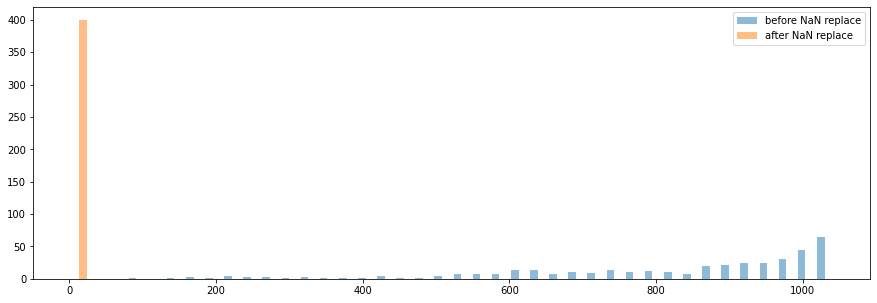

In [18]:
plt.figure(figsize=(15,5))
plt.hist([movie_ratings_df.isna().sum(), clean_movie_ratings_df.isna().sum()], bins = 40, alpha=0.5, 
         label=['before NaN replace','after NaN replace']);
plt.legend(loc='upper right')
plt.show();


In [19]:
# 1 nan before dropping 896
print(movie_ratings_df_T.median().isna().sum())
#no nan after dropping 896
print(clean_movie_ratings_df_T.median().isna().sum())

1
0





### Q1:


**Note:** For all missing values in the data, use the average of the corresponding column so to fill in the missing data. 

In this problem, under the most correlated, we consider the largest correlation in the absolute value.

1.1. For every user in the given data, find its most correlated user.

1.2. What is the pair of the most correlated users in the data?

1.3. What is the value of this highest correlation?

1.4. For users 0, 1, 2, \dots, 9, print their most correlated users.


In this problem, under **the most correlated**, we consider the largest correlation in the absolute value.


#### 1.1. For every user in the given data, find its most correlated user. 

The function that I will use to calculate the correlation matrix does so per column, so I transposed the movies dataframe such that each column represents a user. In order to calculate the most correlated user, I had to take the absolute value of the correlation matrix because correlation is centered at 0. The diagonal values in the matrix represent the correlation of users with itself, and since users are perfectly correlated with itself, we get value 1. So, I replaced the diagonal values with nan in order to not include them when taking the maximum of each column. Then, I calculated the maximum correlation coefficient for each column. 

In [20]:
#Calculate the correlation matrix and take the absolute
def get_corr(df):
    df_c = df.copy()
    corrMatrix = pd.DataFrame(df_c.corr())
    return corrMatrix

#dont include userID in calculating the correlation matrix
user_corrMatrix = get_corr(clean_movie_ratings_df_T)
user_corrMatrix = user_corrMatrix.abs()
user_corrMatrix.head()

,0,1,2,3,4,5,6,7,8,9,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
0,1.000000,0.507565,0.500459,0.313925,0.315982,0.398116,0.373631,0.255274,0.431424,0.467126,...,0.277487,0.297565,0.431710,0.411643,0.497973,0.467809,0.077287,0.371414,0.517034,0.319804
1,0.507565,1.000000,0.813772,0.492197,0.433665,0.621429,0.590675,0.340007,0.716737,0.709490,...,0.410896,0.423314,0.621493,0.656051,0.736166,0.760270,0.213550,0.626545,0.786543,0.550188
2,0.500459,0.813772,1.000000,0.440711,0.490873,0.703376,0.593500,0.393405,0.702392,0.772925,...,0.483745,0.423299,0.620012,0.739312,0.880187,0.880645,0.224022,0.742695,0.840381,0.536125
3,0.313925,0.492197,0.440711,1.000000,0.283594,0.342642,0.468030,0.290844,0.565992,0.358119,...,0.129020,0.405688,0.433247,0.436862,0.426152,0.437324,0.132947,0.441883,0.398933,0.301998
4,0.315982,0.433665,0.490873,0.283594,1.000000,0.377024,0.286257,0.223248,0.397032,0.362359,...,0.225610,0.331444,0.325412,0.392946,0.408718,0.456091,0.136238,0.426158,0.418500,0.279564


In [21]:
#replace diagonal with nan
def replace_diagonal(df):
    df_c= df.copy()
    np.fill_diagonal(df_c.to_numpy(), np.nan)
    return df_c

user_corrMatrix = replace_diagonal(user_corrMatrix)
user_corrMatrix

,0,1,2,3,4,5,6,7,8,9,...,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095
0,NaN,0.507565,0.500459,0.313925,0.315982,0.398116,0.373631,0.255274,0.431424,0.467126,...,0.277487,0.297565,0.431710,0.411643,0.497973,0.467809,0.077287,0.371414,0.517034,0.319804
1,0.507565,NaN,0.813772,0.492197,0.433665,0.621429,0.590675,0.340007,0.716737,0.709490,...,0.410896,0.423314,0.621493,0.656051,0.736166,0.760270,0.213550,0.626545,0.786543,0.550188
2,0.500459,0.813772,NaN,0.440711,0.490873,0.703376,0.593500,0.393405,0.702392,0.772925,...,0.483745,0.423299,0.620012,0.739312,0.880187,0.880645,0.224022,0.742695,0.840381,0.536125
3,0.313925,0.492197,0.440711,NaN,0.283594,0.342642,0.468030,0.290844,0.565992,0.358119,...,0.129020,0.405688,0.433247,0.436862,0.426152,0.437324,0.132947,0.441883,0.398933,0.301998
4,0.315982,0.433665,0.490873,0.283594,NaN,0.377024,0.286257,0.223248,0.397032,0.362359,...,0.225610,0.331444,0.325412,0.392946,0.408718,0.456091,0.136238,0.426158,0.418500,0.279564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,0.467809,0.760270,0.880645,0.437324,0.456091,0.663632,0.513005,0.334659,0.704880,0.718597,...,0.416694,0.381762,0.584376,0.735713,0.835887,NaN,0.185093,0.726167,0.799828,0.473544
1092,0.077287,0.213550,0.224022,0.132947,0.136238,0.162144,0.178176,0.116343,0.196717,0.170374,...,0.062910,0.198341,0.215074,0.183686,0.225120,0.185093,NaN,0.178374,0.242489,0.106442
1093,0.371414,0.626545,0.742695,0.441883,0.426158,0.586385,0.442742,0.316222,0.589168,0.619292,...,0.367238,0.345398,0.561531,0.625719,0.662469,0.726167,0.178374,NaN,0.693554,0.421782
1094,0.517034,0.786543,0.840381,0.398933,0.418500,0.701781,0.581282,0.372027,0.686209,0.716031,...,0.423908,0.444326,0.663457,0.760938,0.816061,0.799828,0.242489,0.693554,NaN,0.495484


In [22]:
#find the maximum correlation coefficient within each column
def get_max_corr(corr_df, col_names):
    corrMatrix= corr_df.copy()
    user_l = []
    max_corr_value_l = []
    max_corr_value_idx_l = [] 
    for c in corrMatrix.columns:
        #print(c)
        user_l.append(c)
        max_corr_value_l.append(corrMatrix[c].max())
        max_corr_value_idx_l.append(corrMatrix[c].idxmax())
        
    #create a dataframe which looks neater
    high_corr_df = pd.DataFrame(list(zip(user_l, max_corr_value_l, max_corr_value_idx_l)),
                                columns =col_names)
    #add 1 to any user id that is greater than 895

    high_corr_df["user"]  = high_corr_df["user"].apply(lambda x : x+1 if x > 895 else x)
    high_corr_df["highest_corr_user"]  = high_corr_df["highest_corr_user"].apply(lambda x : x+1 if x > 895 else x)
    return high_corr_df

user_max_corr_df = get_max_corr(user_corrMatrix, ["user", "highest_corr", "highest_corr_user"])
print(user_max_corr_df.to_string())

      user  highest_corr  highest_corr_user
0        0      0.586956                118
1        1      0.851331                831
2        2      0.955787                831
3        3      0.592000                704
4        4      0.518921                784
5        5      0.779583                990
6        6      0.698975               1071
7        7      0.413597               1074
8        8      0.807810                821
9        9      0.829359               1004
10      10      0.746129                831
11      11      0.625898                428
12      12      0.756157               1083
13      13      0.807937                152
14      14      0.776334                 17
15      15      0.823369                219
16      16      0.598695                967
17      17      0.959398                831
18      18      0.851736                831
19      19      0.764129                237
20      20      0.809323                353
21      21      0.765426        


## 1.2. What is the pair of the most correlated users in the data? 

The most correlated users in the data is  (239, 831).

In [23]:
#find the maximum value in the correlation coefficient
max_user_max_corr_df = np.max(user_max_corr_df["highest_corr"])
print("maximum correlation coefficient:",max_user_max_corr_df)

#double check to make sure it returns the value expected
max_user_max_corr_df = user_corrMatrix.copy().max().max()
print("maximum correlation coefficient:",max_user_max_corr_df)

pair_max_corr = user_max_corr_df[user_max_corr_df["highest_corr"] == max_user_max_corr_df].reset_index()
pair_max_corr

maximum correlation coefficient: 0.9837428810656105
maximum correlation coefficient: 0.9837428810656105


,index,user,highest_corr,highest_corr_user
0,239,239,0.983743,831
1,831,831,0.983743,239


In [24]:
print("The pair of the most correlated users:", (pair_max_corr.loc[0,"user"], pair_max_corr.loc[0,"highest_corr_user"] ))

The pair of the most correlated users: (239, 831)



## 1.3. What is the value of this highest correlation?

The value of the highest correlation was 0.9837428810656105

In [25]:
print("Highest correlation:", pair_max_corr.loc[0,"highest_corr"])

Highest correlation: 0.9837428810656105


## 1.4. For users 0, 1, 2, \dots, 9, print their most correlated users. 

In [26]:
for i in range(10):
    print((i, user_max_corr_df.loc[i,"highest_corr_user"]))

(0, 118)
(1, 831)
(2, 831)
(3, 704)
(4, 784)
(5, 990)
(6, 1071)
(7, 1074)
(8, 821)
(9, 1004)


In [27]:
for i in range(10):
    print("Most correlated user of", i, "is", user_max_corr_df.loc[i,"highest_corr_user"])

Most correlated user of 0 is 118
Most correlated user of 1 is 831
Most correlated user of 2 is 831
Most correlated user of 3 is 704
Most correlated user of 4 is 784
Most correlated user of 5 is 990
Most correlated user of 6 is 1071
Most correlated user of 7 is 1074
Most correlated user of 8 is 821
Most correlated user of 9 is 1004


### Q2:

We want to find a model between the ratings and the personal part of the data. To do so, consider:


**Part 1**: the ratings of all users over columns 1-400: 

-- Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing);

call this part `df_rate`


and 


**Part 2**:  the part of the data which includes all users over columns 401-474

-- Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)

-- Columns 422-464: These columns contain responses to personality questions (1-5)

-- Columns 465-474: These columns contain self-reported movie experience ratings (1-5)

call this part `df_pers`.

---

Our main task is to model: 


`df_pers = function(df_rate)`


---

**Note:** Split the original data into training and testing as the ratio 0.80: 0.20. 


2.1. Model `df_pers = function(df_rate)` by using the linear regression. 

What are the errors on: (i) the training part; (ii) the testing part?


We need to predict answers to the behaviour questions using the movie ratings. Since there are 77 different types of behaviour questions we need to build 77 different models. We have 400 different movie ratings (independent variables) as the input, so each model is a multi-variant linear regression. The average mean squared error is 0.59310798 for training data and 3.35801758 for testing data.

## Oridinary least square linear regression (OLS)

Let $X_1, X_2,...,X_{400}$ be the independent variables and $Y$ be one of the 77 dependent variables. Then, for each user, we predict $\hat Y$ by assigning weight, $\beta_j$, to $X_j$ by minimizing the sum of squared residual, i.e.

$$min \sum_{i=1}^{1096} (Y^n - \hat Y^n)^2$$

where, $i$ represents the $i^{th}$ user and

$$ \hat Y^i = \beta_0 + \sum_{j=1}^{400}(\beta_j*X_j^i)$$


We found the errors on the training and testing dataset using mean squared error and found the average error to be [0.59310798, 3.35801758] when we didnt replace the missing values of dependent variable and [0.5915893 , 3.30636205] when we replaced the missing values of dependent variable by its median. 

In [28]:
#clean_movie_ratings_df 
#1.user 896 removed
#2.nan filled with median value of the movie ratings by other users
df_rate = clean_movie_ratings_df.copy()
print(df_rate.shape)
df_rate.head()

(1096, 400)


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II,Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.5,2.0,4.0,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,3.0,3.5,3.0,4.0,0.5,2.5,2.5,2.5,2.0,2.5
1,2.5,2.0,1.5,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,3.0,3.5,3.0,3.0,4.0,2.5,2.5,2.5,2.0,2.5
2,2.5,2.0,3.5,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,3.0,3.5,3.0,3.0,3.5,2.5,2.5,2.5,2.0,2.5
3,2.5,2.0,2.0,3.0,3.0,3.0,2.5,3.0,2.5,4.0,...,3.0,3.0,3.0,3.0,2.5,2.5,2.5,2.5,2.0,2.5
4,2.5,2.0,3.5,3.0,0.5,3.0,0.5,1.0,2.5,0.0,...,2.5,3.5,3.0,3.0,3.5,2.5,2.5,1.5,2.0,2.5


In [29]:
#clean_other_ratings_df
#2.-1 with nan for 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)' and 
#'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)' 

df_pers = clean_other_ratings_df.copy()
print(df_pers.shape)
df_pers.head()

(1096, 77)


,I enjoy driving fast,I enjoy rollercoasters,Have you ever bungee-jumped?,I enjoy impulse shopping,I sometimes go out on weeknights even if I have work to do,I enjoy doing things without too much planning,Have you ever been rock climbing?,I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve,I enjoy going to large music or dance festivals,I enjoy watching horror movies,...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,5.0,5.0,2.0,5.0,1.0,2.0,3.0,1.0,4.0,1.0,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0.0,1.0
1,4.0,5.0,2.0,4.0,2.0,1.0,1.0,2.0,4.0,1.0,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0.0,0.0
2,4.0,4.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,1.0,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1.0,0.0
3,5.0,5.0,2.0,5.0,4.0,2.0,4.0,4.0,5.0,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0.0,1.0
4,4.0,1.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1.0,1.0


In [30]:
from sklearn.model_selection import train_test_split

#split the data into 80-20 train-test
X_train, X_test, y_train, y_test  =  train_test_split(df_rate, df_pers, test_size= 0.2, random_state = 111)
# remove shuffle after checking answers, add random_state
#check the shape of the dataframes to make sure the df_rate and df_pers are split as expected
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(876, 400)
(876, 77)
(220, 400)
(220, 77)


## Not replacing the missing values of dependent variables with median

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mse_comb= []

for c in y_train.columns:    
    #for each column of dependent variables only select the non missing data 
    clean_y_train = y_train[y_train[c].notna()][c]
    #print(clean_y_train.shape)
    #get index from clean_y_train to only select the corresponding X_train
    clean_X_train = X_train.loc[clean_y_train.index.values.tolist(),:]
    #print(clean_X_train.shape)

    clean_y_test = y_test[y_test[c].notna()][c]
    #print(clean_y_test.shape)
    clean_X_test = X_test.loc[clean_y_test.index.values.tolist(),:]
    #print(clean_X_test.shape)
    
    est = LinearRegression()
    est.fit(clean_X_train, clean_y_train)
    
    #check the coefficents of models 
    #print(est.coef_)
    #check the bias of models 
    #print(est.intercept_)

    mse_comb.append([mean_squared_error(clean_y_train, est.predict(clean_X_train)),
                     mean_squared_error(clean_y_test, est.predict(clean_X_test))])
    

In [32]:
mse_df = pd.DataFrame(mse_comb, columns =["train_mse","test_mse"])
mse_df.head()

,train_mse,test_mse
0,0.757459,2.998460
1,1.078649,6.990170
2,0.297838,1.652741
3,0.767853,4.815442
4,0.896602,6.863973


In [33]:
avg_mse_train = mse_df["train_mse"].mean()
avg_mse_test = mse_df["test_mse"].mean()
np.mean(mse_comb, axis=0)

array([0.59310798, 3.35801758])

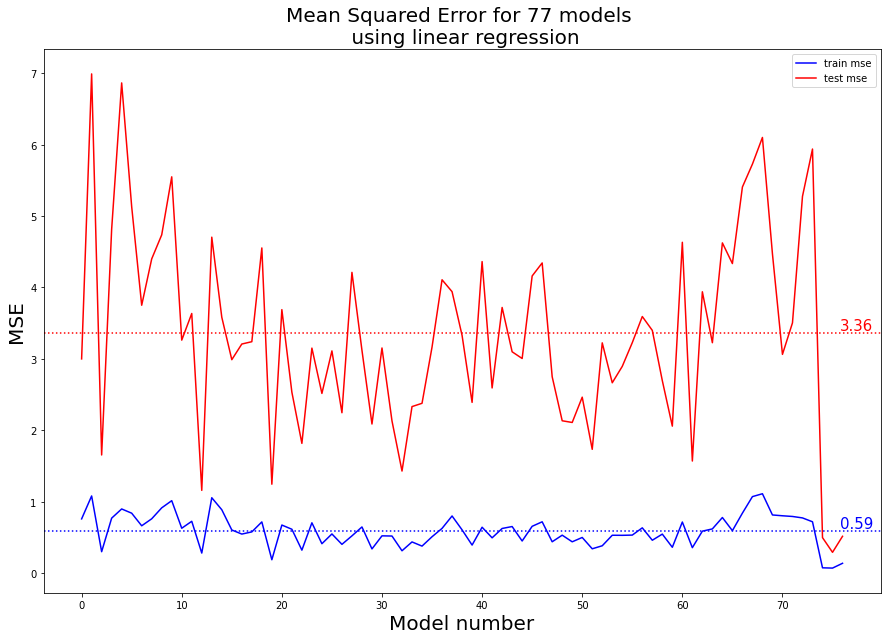

In [34]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

fig, ax=plt.subplots(figsize =(15,10))
ax.plot(mse_df["train_mse"], color='b', label = "train mse")
ax.plot(mse_df["test_mse"], color='r', label = "test mse")
ax.axhline(y=avg_mse_train, color='b', linestyle='dotted')
ax.axhline(y=avg_mse_test, color='r', linestyle='dotted')
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(1,avg_mse_train,round(avg_mse_train,2), color="blue", transform=trans, 
        ha="right", va="bottom", fontsize = 15)
ax.text(1,avg_mse_test,round(avg_mse_test,2), color="red", transform=trans, 
        ha="right", va="bottom", fontsize = 15)
plt.xlabel("Model number", fontsize = 20)
plt.ylabel("MSE", fontsize = 20)
plt.title("Mean Squared Error for 77 models \n using linear regression", fontsize = 20)
plt.legend()
plt.show()


## Replacing the missing values of dependent variables with median

In [35]:
mse_comb= []

for c in y_train.columns:
    #fill missing records of dependent variables with the median value of that variable
    clean_y_train = y_train[c].fillna(y_train[c].median())
    #print(clean_y_train.shape)
    clean_X_train = X_train
    #print(clean_X_train.shape)

    clean_y_test = y_test[c].fillna(y_train[c].median())
    #print(clean_y_test.shape)
    clean_X_test = X_test
    #print(clean_X_test.shape)
    
    est = LinearRegression()
    est.fit(clean_X_train, clean_y_train)
    
    #check the coefficents of models 
    #print(est.coef_)
    #check the bias of models 
    #print(est.intercept_)

    mse_comb.append([mean_squared_error(clean_y_train, est.predict(clean_X_train)),
                     mean_squared_error(clean_y_test, est.predict(clean_X_test))])
    

In [36]:
mse_df = pd.DataFrame(mse_comb, columns =["train_mse","test_mse"])
mse_df.head()

,train_mse,test_mse
0,0.756848,2.994186
1,1.075413,7.000661
2,0.297469,1.645931
3,0.767329,4.801967
4,0.895202,6.864459


In [37]:
avg_mse_train = mse_df["train_mse"].mean()
avg_mse_test = mse_df["test_mse"].mean()
np.mean(mse_comb, axis=0)

array([0.5915893 , 3.30636205])

### 2.2. Model `df_pers = function(df_rate)` by using the ridge regression with hyperparamter values alpha from [0.0, 1e-8, 1e-5, 0.1, 1, 10]. 

For every of the previous values for alpha, what are the errors on: (i) the training part; (ii) the testing part?

The more parameters we add the better our prediction will be, but we cannot keep adding parameter because of the curse of dimensionality (i.e. as the number of independent variables the sparsity in our data increases) and also overfitting (i.e. model will do poorly in unseen data). Another issue arises when independent variables are correlated with each other resulting in large $\beta$ coefficients. We can perform dimension reduction step to take care of multi-collinearity and sparsity of data. OLS linear regression is also affected by the outliers. Regularization methods such as ridge regression and lasso regression addresses those issues by penalizing the variance to balance out with bias. 

**Ridge regression** adds the L2 norm to the OSL to minimize the following:

$$min \sum_{i=1}^{1096} (Y^n - \hat Y^n)^2+ \alpha *\beta ^2$$
 
where, $\alpha$ is the hyperparameter that ranges from 0 to $\infty$, and $\beta^2$ is sum of square of the coefficients. 

In this project we used alpha values of [0.0, 1e-8, 1e-5, 0.1, 1, 10] to find the best alpha. 

We found that 10 is the best alpha whether we replaced the missing values of dependent variable or not. 




## Not replacing the missing values of dependent variables with median

In [38]:
from sklearn.linear_model import Ridge

alphas = [0.0, 1e-8, 1e-5, 0.1, 1, 10]
ridge_mse_comb =[]

#for each alpha (hyperparameter) model ride rigression: 
for alpha in alphas:
    for c in y_train.columns:
        #print(c)

        clean_y_train = y_train[y_train[c].notna()][c]
        #print(clean_y_train.shape)
        clean_X_train = X_train.loc[clean_y_train.index.values.tolist(),:]
        #print(clean_X_train.shape)

        clean_y_test = y_test[y_test[c].notna()][c]
        #print(clean_y_test.shape)
        clean_X_test = X_test.loc[clean_y_test.index.values.tolist(),:]
        #print(clean_X_test.shape)

        est_ridge = Ridge(alpha=alpha)
        est_ridge.fit(clean_X_train, clean_y_train)

        #check the coefficents of models 
        #print(est.coef_)
        #check the bias of models 
        #print(est.intercept_)

        ridge_mse_comb.append([c,
                               alpha, 
                               mean_squared_error(clean_y_train, est_ridge.predict(clean_X_train)),
                               mean_squared_error(clean_y_test, est_ridge.predict(clean_X_test))])


## For every of the previous values for alpha, what are the errors on: (i) the training part; (ii) the testing part?

In [39]:
ridge_mse_df = pd.DataFrame(ridge_mse_comb, columns =["question", "alpha","train_mse","test_mse"])
ridge_mse_df.head(5)

,question,alpha,train_mse,test_mse
0,I enjoy driving fast,0.0,0.757459,2.998460
1,I enjoy rollercoasters,0.0,1.078649,6.990170
2,Have you ever bungee-jumped?,0.0,0.297838,1.652741
3,I enjoy impulse shopping,0.0,0.767853,4.815442
4,I sometimes go out on weeknights even if I hav...,0.0,0.896602,6.863973


In [40]:
#average mse for each alpha
plot_ridge_mse_df = pd.DataFrame(ridge_mse_df.groupby("alpha").mean()).reset_index()
plot_ridge_mse_df

,alpha,train_mse,test_mse
0,0.000000e+00,0.593108,3.358018
1,1.000000e-08,0.593108,3.358018
2,1.000000e-05,0.593108,3.358007
3,1.000000e-01,0.593238,3.257250
4,1.000000e+00,0.598835,2.755951
5,1.000000e+01,0.653734,1.878657


## What is a best choice for alpha?

In [41]:
print("The best choice for alpha:", plot_ridge_mse_df.loc[plot_ridge_mse_df["test_mse"].argmin(), "alpha"])

The best choice for alpha: 10.0


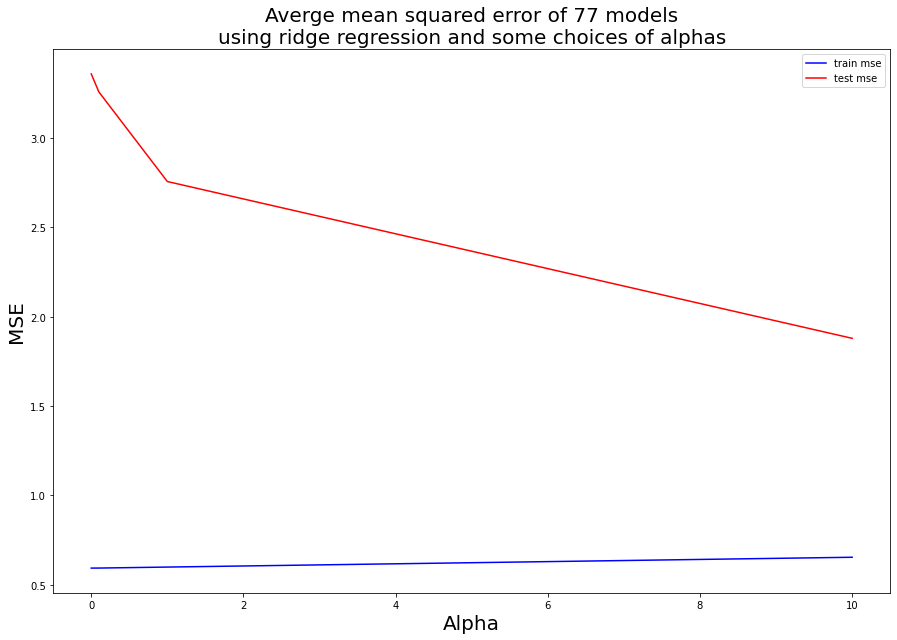

In [42]:
fig, ax=plt.subplots(figsize =(15,10))
ax.plot(plot_ridge_mse_df["alpha"], plot_ridge_mse_df["train_mse"], color='b', label = "train mse")
ax.plot(plot_ridge_mse_df["alpha"], plot_ridge_mse_df["test_mse"], color='r', label = "test mse")
plt.xlabel("Alpha", fontsize = 20)
plt.ylabel("MSE", fontsize = 20)
plt.title("Averge mean squared error of 77 models\nusing ridge regression and some choices of alphas", fontsize = 20)
plt.legend()
plt.show()

## Replacing the missing values of dependent variables with median

In [43]:
alphas = [0.0, 1e-8, 1e-5, 0.1, 1, 10]

ridge_mse_comb =[]

#for each alpha (hyperparameter) model ridge rigression: 
for alpha in alphas:
    for c in y_train.columns:
        #print(c)

        clean_y_train = y_train[c].fillna(y_train[c].median())
        #print(clean_y_train.shape)
        clean_X_train = X_train
        #print(clean_X_train.shape)

        clean_y_test = y_test[c].fillna(y_test[c].median())
        #print(clean_y_test.shape)
        clean_X_test = X_test
        #print(clean_X_test.shape)

        est_ridge = Ridge(alpha=alpha)
        est_ridge.fit(clean_X_train, clean_y_train)

        #check the coefficents of models 
        #print(est.coef_)
        #check the bias of models 
        #print(est.intercept_)

        ridge_mse_comb.append([c,
                               alpha,
                               mean_squared_error(clean_y_train, est_ridge.predict(clean_X_train)),
                               mean_squared_error(clean_y_test, est_ridge.predict(clean_X_test))])


## For every of the previous values for alpha, what are the errors on: (i) the training part; (ii) the testing part?


In [44]:
ridge_mse_df = pd.DataFrame(ridge_mse_comb, columns =["question","alpha","train_mse","test_mse"])
ridge_mse_df.head(5)

,question,alpha,train_mse,test_mse
0,I enjoy driving fast,0.0,0.756848,2.994186
1,I enjoy rollercoasters,0.0,1.075413,7.000661
2,Have you ever bungee-jumped?,0.0,0.297469,1.645931
3,I enjoy impulse shopping,0.0,0.767329,4.801967
4,I sometimes go out on weeknights even if I hav...,0.0,0.895202,6.864459


In [45]:
#average mse for each alpha
plot_ridge_mse_df = pd.DataFrame(ridge_mse_df.groupby("alpha").mean()).reset_index()
plot_ridge_mse_df

,alpha,train_mse,test_mse
0,0.000000e+00,0.591589,3.306362
1,1.000000e-08,0.591589,3.306362
2,1.000000e-05,0.591589,3.306351
3,1.000000e-01,0.591711,3.209729
4,1.000000e+00,0.597008,2.724554
5,1.000000e+01,0.649991,1.863613


## What is a best choice for alpha?

In [46]:
print("The best choice for alpha:", plot_ridge_mse_df.loc[plot_ridge_mse_df["test_mse"].argmin(), "alpha"])

The best choice for alpha: 10.0



### 2.3. Model `df_pers = function(df_rate)` by using the lasso regression with hyperparamter values alpha from [1e-3, 1e-2, 1e-1, 1]. 

For every of the previous values for alpha, what are the errors on: (i) the training part; (ii) the testing part?

What is a best choice for alpha?


**Note**: Ignore any `convergence warning` in case you may obtain in the Lasso regression.


Lasso regression adds the L1 norm to the OSL to minimize the following:

$$min \sum_{i=1}^{1096} (Y^n - \hat Y^n)^2+ \alpha *|\beta|$$
 
where, $\alpha$ is the hyperparameter that ranges from 0 to $\infty$, and $|\beta|$ is the sum of absolute value of coefficients. 

In this project, we used alpha values of [1e-3, 1e-2, 1e-1, 1] to find the best alpha. We found that 0.1 is the best alpha whether we replaced the missing values of dependent variable or not. 




## Not replacing the missing values of dependent variables

In [47]:
from sklearn.linear_model import Lasso
from warnings import filterwarnings
filterwarnings('ignore')

alphas = [1e-3, 1e-2, 1e-1, 1]

lasso_mse_comb =[]

#for each alpha (hyperparameter) model lasso rigression: 
for alpha in alphas:
    for c in y_train.columns:
        #print(c)

        clean_y_train = y_train[y_train[c].notna()][c]
        #print(clean_y_train.shape)
        clean_X_train = X_train.loc[clean_y_train.index.values.tolist(),:]
        #print(clean_X_train.shape)

        clean_y_test = y_test[y_test[c].notna()][c]
        #print(clean_y_test.shape)
        clean_X_test = X_test.loc[clean_y_test.index.values.tolist(),:]
        #print(clean_X_test.shape)

        est_lasso = Lasso(alpha=alpha)
        est_lasso.fit(clean_X_train, clean_y_train)

        #check the coefficents of models 
        #print(est.coef_)
        #check the bias of models 
        #print(est.intercept_)

        lasso_mse_comb.append([c,
                               alpha, 
                               mean_squared_error(clean_y_train, est_lasso.predict(clean_X_train)),
                               mean_squared_error(clean_y_test, est_lasso.predict(clean_X_test))])


### For every of the previous values for alpha, what are the errors on: (i) the training part; (ii) the testing part?

In [48]:
lasso_mse_df = pd.DataFrame(lasso_mse_comb, columns =["question","alpha","train_mse","test_mse"])
lasso_mse_df.head(5)

,question,alpha,train_mse,test_mse
0,I enjoy driving fast,0.001,0.782949,2.230908
1,I enjoy rollercoasters,0.001,1.107400,4.448986
2,Have you ever bungee-jumped?,0.001,0.318080,0.986221
3,I enjoy impulse shopping,0.001,0.795804,3.231119
4,I sometimes go out on weeknights even if I hav...,0.001,0.929125,4.295886


In [49]:
#average mse for each alpha
plot_lasso_mse_df = pd.DataFrame(lasso_mse_df.groupby("alpha").mean()).reset_index()
plot_lasso_mse_df

,alpha,train_mse,test_mse
0,0.001,0.617496,2.311156
1,0.010,0.876047,1.352726
2,0.100,1.184062,1.242754
3,1.000,1.195658,1.249981


## What is a best choice for alpha?

In [50]:
print("The best choice for alpha:", plot_lasso_mse_df.loc[plot_lasso_mse_df["test_mse"].argmin(), "alpha"])

The best choice for alpha: 0.1


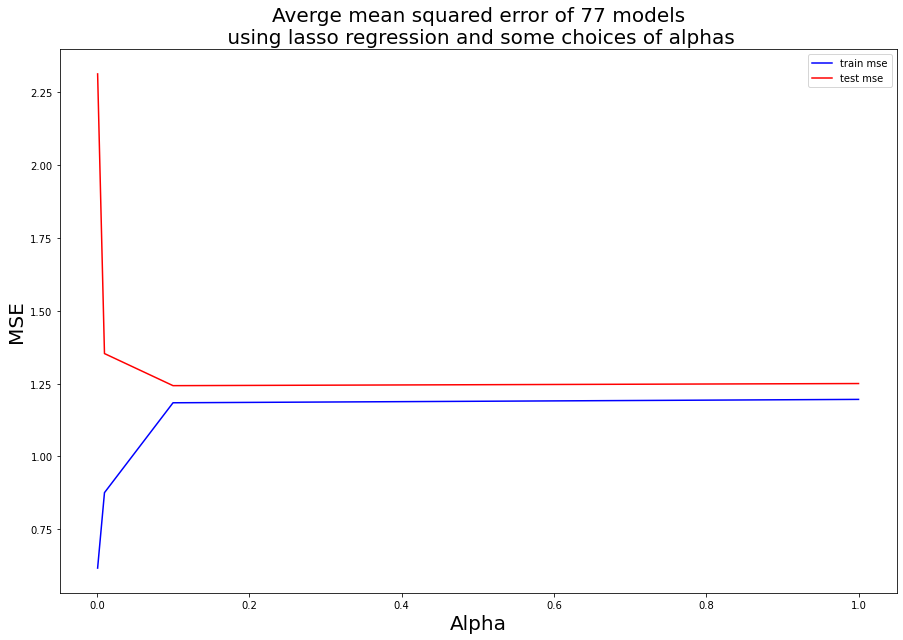

In [51]:
fig, ax=plt.subplots(figsize =(15,10))
ax.plot(plot_lasso_mse_df["alpha"], plot_lasso_mse_df["train_mse"], color='b', label = "train mse")
ax.plot(plot_lasso_mse_df["alpha"], plot_lasso_mse_df["test_mse"], color='r', label = "test mse")
plt.xlabel("Alpha", fontsize = 20)
plt.ylabel("MSE", fontsize = 20)
plt.title("Averge mean squared error of 77 models\n using lasso regression and some choices of alphas", fontsize = 20)
plt.legend()
plt.show()

## Not replacing the missing values of dependent variables with median

In [52]:
filterwarnings('ignore')

alphas = [1e-3, 1e-2, 1e-1, 1]

lasso_mse_comb =[]
#for each alpha (hyperparameter) model lasso rigression: 
for alpha in alphas:
    for c in y_train.columns:
        clean_y_train = y_train[c].fillna(y_train[c].median())
        #print(clean_y_train.shape)
        clean_X_train = X_train
        #print(clean_X_train.shape)

        clean_y_test = y_test[c].fillna(y_test[c].median())
        #print(clean_y_test.shape)
        clean_X_test = X_test
        #print(clean_X_test.shape)

        est_lasso = Lasso(alpha=alpha)
        est_lasso.fit(clean_X_train, clean_y_train)

        #check the coefficents of models 
        #print(est.coef_)
        #check the bias of models 
        #print(est.intercept_)

        lasso_mse_comb.append([c,
                               alpha, 
                               mean_squared_error(clean_y_train, est_lasso.predict(clean_X_train)),
                               mean_squared_error(clean_y_test, est_lasso.predict(clean_X_test))])
        

## For every of the previous values for alpha, what are the errors on: (i) the training part; (ii) the testing part?


In [53]:
lasso_mse_df = pd.DataFrame(lasso_mse_comb, columns =["question", "alpha","train_mse","test_mse"])
lasso_mse_df.head(5)

,question,alpha,train_mse,test_mse
0,I enjoy driving fast,0.001,0.782299,2.227012
1,I enjoy rollercoasters,0.001,1.104114,4.455361
2,Have you ever bungee-jumped?,0.001,0.317625,0.982710
3,I enjoy impulse shopping,0.001,0.795495,3.214056
4,I sometimes go out on weeknights even if I hav...,0.001,0.927766,4.295783


In [54]:
#average mse for each alpha
plot_lasso_mse_df = pd.DataFrame(lasso_mse_df.groupby("alpha").mean()).reset_index()
plot_lasso_mse_df

,alpha,train_mse,test_mse
0,0.001,0.615551,2.277941
1,0.010,0.870491,1.344684
2,0.100,1.171414,1.240269
3,1.000,1.182577,1.247309


## What is a best choice for alpha?

In [55]:
print("The best choice for alpha:", plot_lasso_mse_df.loc[plot_lasso_mse_df["test_mse"].argmin(), "alpha"])

The best choice for alpha: 0.1
